# Capítulo 4 - Análise de grupos

## Bibliotecas básicas e outras inicializações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_csv('./datasets/Iris.csv')
print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.head()

Linhas: 150 | Colunas: 6


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dados.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Medidas de similaridade

### Distância Euclideana

In [4]:
from scipy.spatial.distance import pdist, squareform
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='euclidean'))
print(distancia)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### Distância de Jaccard

In [5]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='jaccard'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


### Distância de Hamming

In [6]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='hamming'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


### Distância de Matching

In [7]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='matching'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


## Métodos de agrupamento e representação de grupos

### Agrupamento hierárquico aglomerativo

In [8]:
from sklearn.cluster import AgglomerativeClustering

dados_copy = dados.drop(['Species', 'Id'], axis=1).copy().values
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dados_copy)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

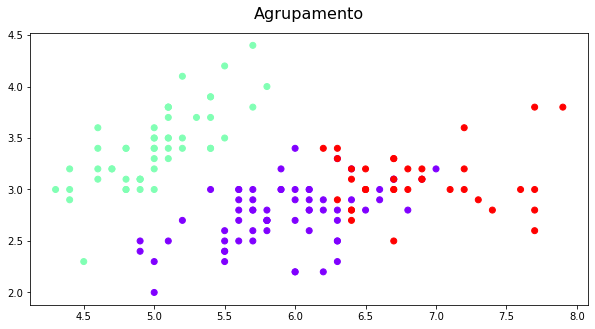

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Agrupamento', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=cluster.labels_, cmap='rainbow')
plt.show()

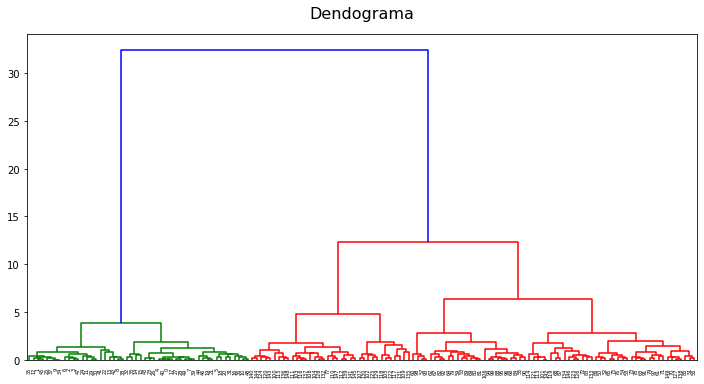

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 6))
plt.title('Dendograma', fontsize=16, y=1.03)
dend = shc.dendrogram(shc.linkage(dados_copy, method='ward'))

### Agrupamento particional

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(dados_copy)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

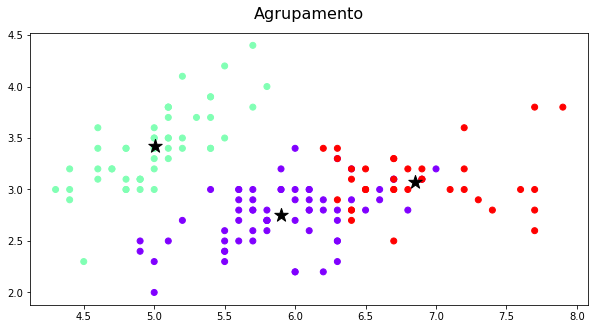

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Agrupamento', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=cluster.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='k', marker='*')
plt.show()